In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [8]:
data = pd.read_csv('cardio_clean.csv', delimiter=';')
data.columns


Index(['AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'AP_HIGH', 'AP_LOW', 'CHOLESTEROL',
       'GLUCOSE', 'SMOKE', 'ALCOHOL', 'PHYSICAL_ACTIVITY', 'CARDIO_DISEASE'],
      dtype='object')

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB
None


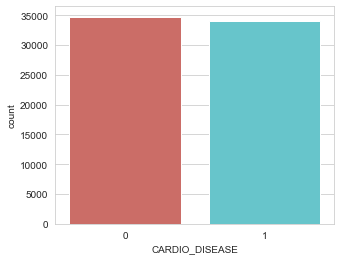

In [10]:
sb.countplot(x='CARDIO_DISEASE', data=data, palette='hls')

In [11]:
data.isnull().sum()

AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
AP_HIGH              0
AP_LOW               0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICAL_ACTIVITY    0
CARDIO_DISEASE       0
dtype: int64

In [12]:
data.describe()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,1.348749,164.361252,74.121934,126.614585,81.381591,1.364727,1.225986,0.088001,0.053632,0.803367,0.494904
std,6.768163,0.476578,8.184850,14.331392,16.763763,9.676679,0.678976,0.571961,0.283299,0.225293,0.397455,0.499978
min,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


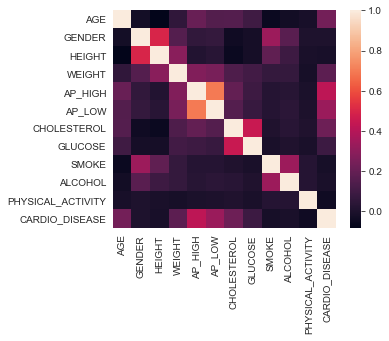

In [14]:
sb.heatmap(data.corr())

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('CARDIO_DISEASE', axis=1),
                                                   data['CARDIO_DISEASE'], test_size=0.2)

print(X_train.shape)
print(y_train.shape)


(55026, 11)
(55026,)


In [20]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [21]:
y_pred = LogReg.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      7059
           1       0.75      0.67      0.71      6698

    accuracy                           0.73     13757
   macro avg       0.73      0.73      0.73     13757
weighted avg       0.73      0.73      0.73     13757



In [23]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[21685,  5998],
       [ 9041, 18302]], dtype=int64)

In [24]:
precision_score(y_train, y_train_pred)

0.7531687242798354